<a href="https://colab.research.google.com/github/ankita026/FDIP_FA2/blob/main/fdip_fa2_f008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install -q kaggle

# Upload your kaggle.json (API key from your Kaggle account)
from google.colab import files
files.upload()  # select kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ankitabharkade","key":"980703463bd0098bbb484ee2a63bd7f4"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d techsash/waste-classification-data -p /content/
!unzip -q /content/waste-classification-data.zip -d /content/waste_data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 93% 398M/427M [00:06<00:00, 64.5MB/s]
100% 427M/427M [00:06<00:00, 67.0MB/s]


In [ ]:
!ls /content/waste_data


dataset  DATASET


In [ ]:
!ls -R /content/waste_data


Streaming output truncated to the last 5000 lines.
R_1781.jpg  R_3281.jpg	R_4782.jpg  R_6282.jpg	R_7783.jpg  R_9283.jpg
R_1782.jpg  R_3282.jpg	R_4783.jpg  R_6283.jpg	R_7784.jpg  R_9284.jpg
R_1783.jpg  R_3283.jpg	R_4784.jpg  R_6284.jpg	R_7785.jpg  R_9285.jpg
R_1784.jpg  R_3284.jpg	R_4785.jpg  R_6285.jpg	R_7786.jpg  R_9286.jpg
R_1785.jpg  R_3285.jpg	R_4786.jpg  R_6286.jpg	R_7787.jpg  R_9287.jpg
R_1786.jpg  R_3286.jpg	R_4787.jpg  R_6287.jpg	R_7788.jpg  R_9288.jpg
R_1787.jpg  R_3287.jpg	R_4788.jpg  R_6288.jpg	R_7789.jpg  R_9289.jpg
R_1788.jpg  R_3288.jpg	R_4789.jpg  R_6289.jpg	R_778.jpg   R_928.jpg
R_1789.jpg  R_3289.jpg	R_478.jpg   R_628.jpg	R_7790.jpg  R_9290.jpg
R_178.jpg   R_328.jpg	R_4790.jpg  R_6290.jpg	R_7791.jpg  R_9291.jpg
R_1790.jpg  R_3290.jpg	R_4791.jpg  R_6291.jpg	R_7792.jpg  R_9292.jpg
R_1791.jpg  R_3291.jpg	R_4792.jpg  R_6292.jpg	R_7793.jpg  R_9293.jpg
R_1792.jpg  R_3292.jpg	R_4793.jpg  R_6293.jpg	R_7794.jpg  R_9294.jpg
R_1793.jpg  R_3293.jpg	R_4794.jpg  R_6294.jpg	R_7795.jp

In [ ]:
!ls /content/waste_data | head -20


dataset
DATASET


In [ ]:
!ls /content/waste_data/dataset | head -20


DATASET


In [ ]:
!ls /content/waste_data/DATASET | head -20


TEST
TRAIN


In [ ]:
!ls /content/waste_data/DATASET/TRAIN | head -20


O
R


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 32

train_dir = "/content/waste_data/DATASET/TRAIN"
val_dir = "/content/waste_data/DATASET/TEST"  # or use a subfolder for validation

# Data generator with rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50
)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


565/565 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.7688 - loss: 0.5105 - val_accuracy: 0.7983 - val_loss: 0.4121
Epoch 2/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.8331 - loss: 0.3977 - val_accuracy: 0.8298 - val_loss: 0.3771
Epoch 3/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.8503 - loss: 0.3599 - val_accuracy: 0.8482 - val_loss: 0.3461
Epoch 4/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.8672 - loss: 0.3251 - val_accuracy: 0.8411 - val_loss: 0.3670
Epoch 5/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.8689 - loss: 0.3166 - val_accuracy: 0.8189 - val_loss: 0.3833
Epoch 6/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.8854 - loss: 0.2792 - val_accuracy: 0.8320 - val_loss: 0.4062
Epoch 7/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9002 - loss: 0.2525 - val_accuracy: 0.8382 - val_loss: 0.3970
Epoch 8/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9094 - loss: 0.2284 - val_accurac

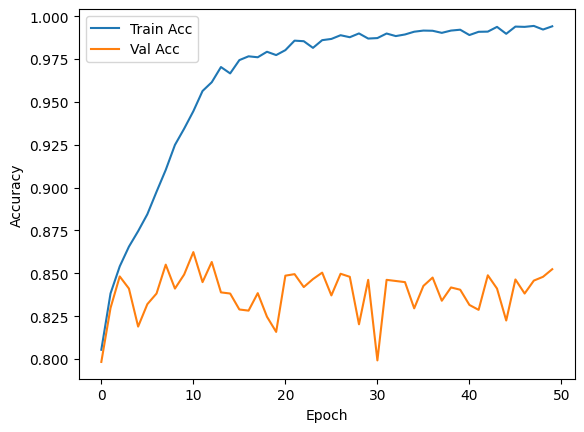

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


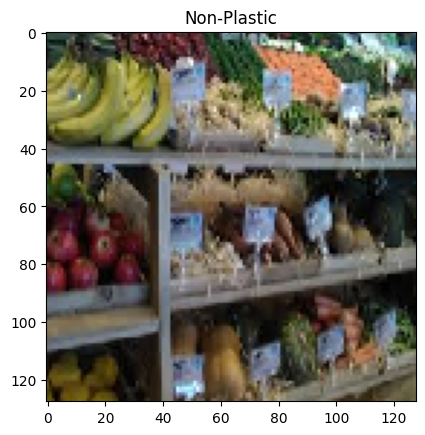

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Pick a random validation image
img_path = val_generator.filepaths[np.random.randint(len(val_generator.filepaths))]
img = image.load_img(img_path, target_size=(128,128))
x = image.img_to_array(img)/255.0
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
plt.imshow(img)
plt.title("Plastic" if pred[0][0]>0.5 else "Non-Plastic")
plt.show()


In [ ]:
model.save("plastic_classifier.h5")
